In [1]:
cd /Users/YINAN/Documents/Code/Pycharm/Sealion/

/Users/YINAN/Documents/Code/Pycharm/Sealion


In [2]:
from ast import literal_eval
import pandas as pd
import utils
import cv2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.
/Users/YINAN/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
model_path = '/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/checkpoint.hdf5'
test_data_path = '/Users/YINAN/Local/Sea-lions/Patches/test/'
model = keras.models.load_model(model_path)

In [4]:
test_datagen = ImageDataGenerator(
        rescale=1./255)

In [5]:
test_generator = test_datagen.flow_from_directory(
        test_data_path,
        target_size=(96,96),
        batch_size=50,
        shuffle=False) 

Found 97666 images belonging to 6 classes.


In [6]:
pred_prob = model.predict_generator(test_generator)
pred_classes = np.array([x.argmax() for x in pred_prob])

In [7]:
mc = confusion_matrix(test_generator.classes, pred_classes)

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] + 1e-6
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Normalized confusion matrix
[[ 0.25482334  0.16561014  0.04911268  0.31104161  0.00939186  0.21002638]
 [ 0.07235722  0.60018653  0.08812716  0.07606779  0.01855388  0.14471343]
 [ 0.001951    0.0124635   0.9425385   0.021826    0.017351    0.003876  ]
 [ 0.1672012   0.06574835  0.15735141  0.49446049  0.0374302   0.07781435]
 [ 0.12846448  0.03098337  0.21587002  0.18262065  0.35415717  0.08791032]
 [ 0.11669229  0.41063616  0.06499361  0.1506657   0.01034073  0.24667751]]


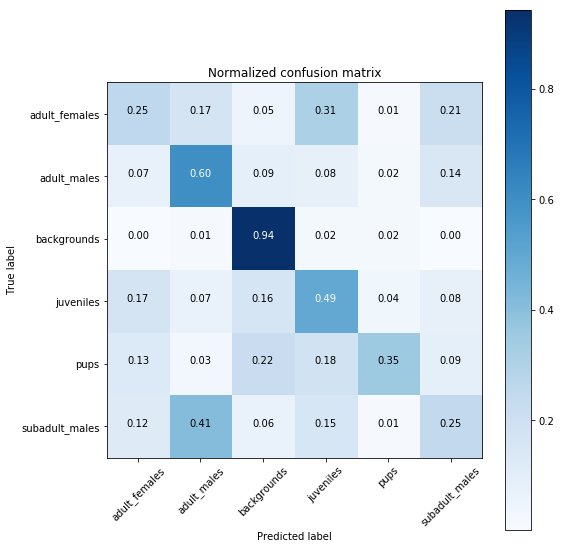

In [9]:
plt.figure()
plot_confusion_matrix(mc, classes=list(test_generator.class_indices.keys()), normalize=True,
                      title='Normalized confusion matrix')
plt.show()